<a href="https://colab.research.google.com/github/trDalmi/Machine-Learning/blob/main/GD_refressor_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X,y = make_regression(n_samples= 100,n_features = 1,n_informative=1,n_targets = 1,noise = 20)

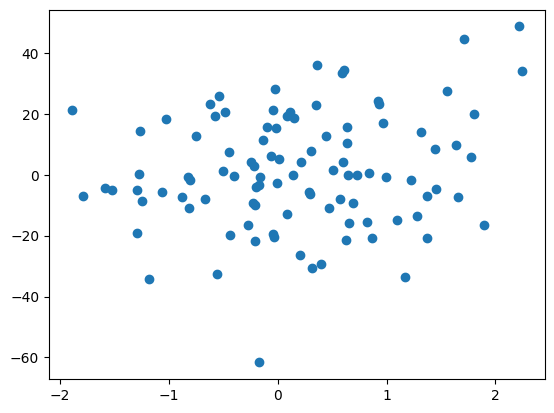

In [6]:
plt.scatter(X,y)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[5.32332023]
0.8918792129758932


In [11]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.16245509763099442

In [12]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.m = 100
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs
  def fit(self,X,y):
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
      loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b)*X.ravel())

      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)
    print(self.m,self.b)

  def predict(self,X):
    return self.m * X + self.b

In [13]:
gd = GDRegressor(0.001,50)

In [14]:
gd.fit(X_train,y_train)

5.809146563924943 0.6077776818268804


In [15]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.18143737453602515

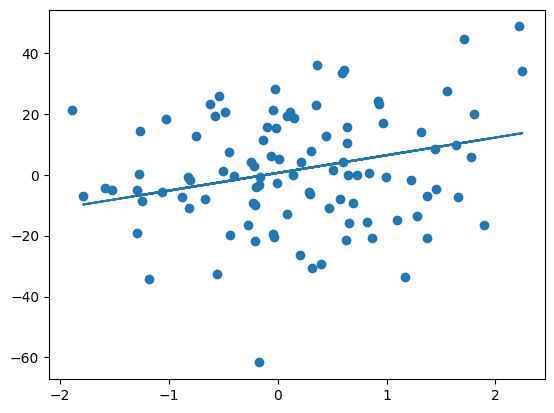

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X_test,y_pred)